# Linear Regression


## Imports

In [80]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
from typing import List, Callable, Dict, Tuple

## Forward and Backward Pass

In [81]:
def forward_loss(X_batch: ndarray, y_batch: ndarray, weights: Dict[str, ndarray]) -> Tuple[float, Dict[str, ndarray]]:

    # Forward pass for the linear regression

    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[1] == weights['W'].shape[0]
    assert weights['B'].shape[0] == weights['B'].shape[1] == 1

    N = np.dot(X_batch, weights['W'])
    P = N + weights['B']
    loss = np.mean(np.power(y_batch-P, 2))

    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X_batch
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y_batch

    return loss, forward_info


def loss_gradients(forward_info: Dict[str, ndarray], weights: Dict[str, ndarray]) -> Dict[str, ndarray]:

    # Compute dLdB and dLdW for linear regression (Backward Pass)
    batch_size = forward_info['X'].shape[0]

    dLdP = -2 * (forward_info['y'] - forward_info['P'])

    dPdN = np.ones_like(forward_info['N'])

    dPdB = np.ones_like(weights['B'])

    dLdN = dLdP * dPdN

    dNdW = np.transpose(forward_info['X'], (1, 0))

    dLdW = np.dot(dNdW, dLdN)

    dLdB = (dLdP * dPdB).sum(axis=0)

    loss_gradients: Dict[str, ndarray] = {}
    loss_gradients['W'] = dLdW
    loss_gradients['B'] = dLdB

    return loss_gradients

## Model Error

In [82]:
def mae(preds: ndarray, actuals:  ndarray):

    # Compute mean absolute error

    return np.mean(np.abs(preds-actuals))


def rmse(preds: ndarray, actuals: ndarray):
    # Compute root mean squared error

    return np.sqrt(np.mean(np.power(preds-actuals, 2)))

## Utils

In [83]:
def permute_data(X: ndarray, y: ndarray):

    # Permute X and y using the same permutation along axis = 0

    perm = np.random.permutation(X.shape[0])
    return X[perm], y[perm]


Batch = Tuple[ndarray, ndarray]


def generate_batch(X: ndarray, y: ndarray, start: int = 0, batch_size: int = 10) -> Batch:

    # Generate batch from given x and y

    assert X.ndim == y.ndim == 2

    if start + batch_size > X.shape[0]:
        batch_size = X.shape[0] - start

    X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]

    return X_batch, y_batch


def init_weights(n_in: int) -> Dict[str, ndarray]:

    # Initialize weights on first forward pass of model

    weights: Dict[str, ndarray] = {}

    W = np.random.randn(n_in, 1)
    B = np.random.randn(1, 1)

    weights['W'] = W
    weights['B'] = B

    return weights

def r2_score(preds: ndarray, y_test: ndarray) -> ndarray:

    return 1 - np.abs(np.round(np.mean((y_test-preds)/y_test), 4))

## Train Function

In [84]:
def train(X: ndarray, y: ndarray, n_iter: int = 1000, learning_rate: float = 0.01, batch_size: int = 100, return_losses: bool = False, return_weights: bool = False) -> None:

    # Train model for certain number of epochs

    start = 0

    # Initialize weights
    weights = init_weights(X.shape[1])

    # Permute Data
    X, y = permute_data(X, y)

    if return_losses:
        losses = []

    for i in range(n_iter):

        # Generate Batch
        if start >= X.shape[0]:
            X, y = permute_data(X, y)
            start = 0

        X_batch, y_batch = generate_batch(X, y, start, batch_size)
        start += batch_size

        # Train net using generated batch
        loss, forward_info = forward_loss(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)

        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

    if return_weights:
        return losses, weights

    return None

## Data Preparation


In [85]:
# For data i use sklearn

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

boston = load_boston()

data = boston.data

target = boston.target
features = boston.feature_names

# Standarize data by removing the mean and scaling to unit variance
s = StandardScaler()
data = s.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

## Training

In [86]:
train_info = train(X_train, y_train, n_iter=1000, learning_rate=0.001,
                   batch_size=23, return_losses=True, return_weights=True)

losses = train_info[0]
weights = train_info[1]

Ploting Loss


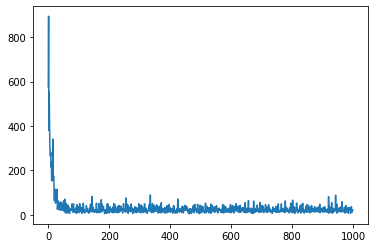

In [87]:
plt.plot(list(range(1000)), losses)

## Prediction



In [88]:
def predict(X: ndarray, weights: Dict[str, ndarray]):

    # Generate predictions

    N = np.dot(X, weights['W'])

    return N + weights['B']

In [89]:
preds = predict(X_test, weights)

In [90]:
print("Mean absolute error:", round(mae(preds, y_test), 4))
print("Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 3.4231
Root mean squared error: 4.8126


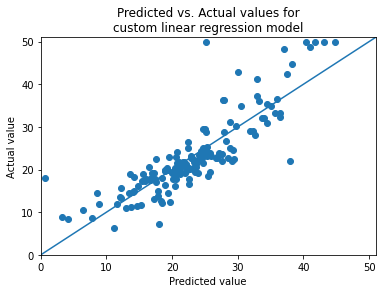

In [91]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\ncustom linear regression model");
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])

## Via Scikit-Learn

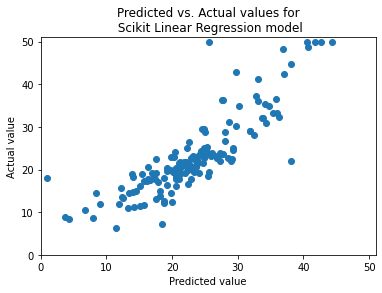

In [92]:
from sklearn.linear_model import LinearRegression
 
lr = LinearRegression()
lr.fit(X_train,y_train)

preds = lr.predict(X_test)

plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\n Scikit Linear Regression model")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
# plt.plot([0, 51], [0, 51]);

## Comparison between manual and Scikit learn model 

In [93]:
# Manual weights
manual_weights = np.round(weights['W'].reshape(-1),4)
print(manual_weights)
# Scikit weights
scikit_weights = np.round(lr.coef_,4)
print(scikit_weights)

# manual bias 
manual_bias = np.round(weights['B'],4)
print(manual_bias)

# scikit_bias
print(np.round(lr.intercept_,4))

[-1.025   1.0237 -0.1634  0.7399 -1.9648  2.6328 -0.213  -3.2193  2.6167
 -1.5826 -2.1343  1.1568 -3.7551]
[[-1.0527  0.9918 -0.0753  0.7323 -1.9545  2.5364 -0.1653 -3.2568  2.7195
  -1.5684 -2.1141  1.1597 -3.8691]]
[[22.4757]]
[22.5523]


# Neural Network Regression

## Sigmoid

Text(0, 0.5, 'sigmoid(x)')

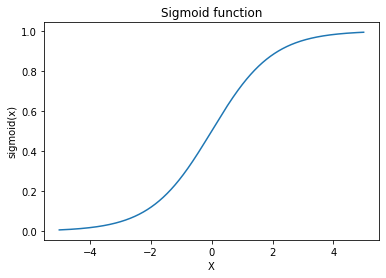

In [94]:
def sigmoid(x: ndarray) -> ndarray:

    # sigmoid is a monotonic function, having a value between 0 and 1, non linear
    # its derivative contain its own function dSigmoid/dX = sigmoid(x) * (1-sigmoid(X))

    return 1 / (1 + np.exp(-1.0*x))


plt.plot(np.arange(-5, 5, 0.01), sigmoid(np.arange(-5, 5, 0.01)))
plt.title('Sigmoid function')
plt.xlabel('X')
plt.ylabel("sigmoid(x)")

## Forward and Backward Pass

In [95]:
def forward_loss(X: ndarray,y: ndarray,weights: Dict[str, ndarray]) -> Tuple[Dict[str, ndarray], float]:
    
    # Compute the forward pass and the loss    
    
    M1 = np.dot(X, weights['W1'])

    N1 = M1 + weights['B1']

    O1 = sigmoid(N1)
    
    M2 = np.dot(O1, weights['W2'])

    P = M2 + weights['B2']    

    loss = np.mean(np.power(y - P, 2))

    forward_info: Dict[str, ndarray] = {}
    forward_info['X'] = X
    forward_info['M1'] = M1
    forward_info['N1'] = N1
    forward_info['O1'] = O1
    forward_info['M2'] = M2
    forward_info['P'] = P
    forward_info['y'] = y

    return forward_info, loss

def loss_gradients(forward_info: Dict[str, ndarray], weights: Dict[str, ndarray]) -> Dict[str, ndarray]:
      
    # Compute the partial derivatives of the loss with respect to each of the parameters in the neural network

    # Dividing by 2m ensures that the cost function doesn't depend on the number of elements in the training set.
    # This allows a better comparison across models.

    dLdP = -(forward_info['y'] - forward_info['P'])
    
    dPdM2 = np.ones_like(forward_info['M2'])

    dLdM2 = dLdP * dPdM2
  
    dPdB2 = np.ones_like(weights['B2'])

    dLdB2 = (dLdP * dPdB2).sum(axis=0)
    
    dM2dW2 = np.transpose(forward_info['O1'], (1, 0))
    
    dLdW2 = np.dot(dM2dW2, dLdP)

    dM2dO1 = np.transpose(weights['W2'], (1, 0)) 

    dLdO1 = np.dot(dLdM2, dM2dO1)
    
    dO1dN1 = sigmoid(forward_info['N1']) * (1- sigmoid(forward_info['N1']))
    
    dLdN1 = dLdO1 * dO1dN1
    
    dN1dB1 = np.ones_like(weights['B1'])
    
    dN1dM1 = np.ones_like(forward_info['M1'])
    
    dLdB1 = (dLdN1 * dN1dB1).sum(axis=0)
    
    dLdM1 = dLdN1 * dN1dM1
    
    dM1dW1 = np.transpose(forward_info['X'], (1, 0)) 

    dLdW1 = np.dot(dM1dW1, dLdM1)

    loss_gradients: Dict[str, ndarray] = {}
    loss_gradients['W2'] = dLdW2
    loss_gradients['B2'] = dLdB2.sum(axis=0)
    loss_gradients['W1'] = dLdW1
    loss_gradients['B1'] = dLdB1.sum(axis=0)
    
    return loss_gradients

## Init weights

In [96]:
def init_weights(input_size: int, hidden_size: int) -> Dict[str, ndarray]:
    
    # Initialize weights during the forward pass

    weights: Dict[str, ndarray] = {}
    weights['W1'] = np.random.randn(input_size, hidden_size)
    weights['B1'] = np.random.randn(1, hidden_size)
    weights['W2'] = np.random.randn(hidden_size, 1)
    weights['B2'] = np.random.randn(1, 1)
    return weights


def predict(X: ndarray, 
            weights: Dict[str, ndarray]) -> ndarray:
    # Genrate predictions 
    
    M1 = np.dot(X, weights['W1'])

    N1 = M1 + weights['B1']

    O1 = sigmoid(N1)

    M2 = np.dot(O1, weights['W2'])

    P = M2 + weights['B2']    

    return P

## Train Function

In [97]:
def train(X_train: ndarray, y_train: ndarray,
          X_test: ndarray, y_test: ndarray,
          n_iter: int = 1000,
          test_every: int = 1000,
          learning_rate: float = 0.01,
          hidden_size= 13,
          batch_size: int = 100,
          return_losses: bool = False, 
          return_weights: bool = False, 
          return_scores: bool = False) -> None:

    start = 0

    # Initialize weights
    weights = init_weights(X_train.shape[1], 
                           hidden_size=hidden_size)

    # Permute data
    X_train, y_train = permute_data(X_train, y_train)
    

    losses = []
        
    val_scores = []

    for i in range(n_iter):

        # Generate batch
        if start >= X_train.shape[0]:
            X_train, y_train = permute_data(X_train, y_train)
            start = 0
        
        X_batch, y_batch = generate_batch(X_train, y_train, start, batch_size)
        start += batch_size
    
        # Train net using generated batch
        forward_info, loss = forward_loss(X_batch, y_batch, weights)

        if return_losses:
            losses.append(loss)

        loss_grads = loss_gradients(forward_info, weights)
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]
        
        if return_scores:
            if i % test_every == 0 and i != 0:
                preds = predict(X_test, weights)
                val_scores.append(r2_score(preds, y_test))

    if return_weights:
        return losses, weights, val_scores
    
    return None


## Training

In [98]:
num_iter = 10000
test_every = 1000
train_info = train(X_train, y_train, X_test, y_test,
                   test_every=test_every,
                   n_iter=num_iter,
                   learning_rate=0.001,
                   batch_size=23,
                   return_losses=True,
                   return_weights=True,
                   return_scores=True)
losses = train_info[0]
weights = train_info[1]
val_scores = train_info[2]



## Prediction

In [99]:
preds = predict(X_test, weights)

In [100]:
print("Mean absolute error:", round(mae(preds, y_test), 4))
print("Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: 2.7356
Root mean squared error: 3.9277


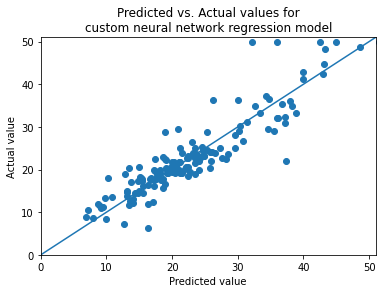

In [101]:
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Predicted vs. Actual values for\ncustom neural network regression model");
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])